In [7]:
import sys
sys.path.insert(0, '../')

from ae_functions import add_gaussian_noise
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
sensornames = ['color', 'depthcolormap', 'icub_left', 'icub_right']
toolnames = ['hook', 'ruler', 'spatula', 'sshot']
actions = ['left_to_right', 'pull', 'push', 'right_to_left']
objectnames = ['0_woodenCube', '1_pearToy', '2_yogurtYellowbottle', '3_cowToy', '4_tennisBallYellowGreen',
            '5_blackCoinbag', '6_lemonSodaCan', '7_peperoneGreenToy', '8_boxEgg','9_pumpkinToy',
            '10_tomatoCan', '11_boxMilk', '12_containerNuts', '13_cornCob', '14_yellowFruitToy',
            '15_bottleNailPolisher', '16_boxRealSense', '17_clampOrange', '18_greenRectangleToy', '19_ketchupToy']

In [3]:
def load_image(image_path, depth=False):
    """ Load an image using OpenCV. """
    if depth:
        return cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)  # Load depth image
    else:
        return cv2.imread(image_path) 
    
def display_image(image, title="Image"):
    """ Display an image using Matplotlib. """
    if len(image.shape) == 2:  # Grayscale or depth image
        plt.imshow(image, cmap='gray')
    else:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def analyze_pixel_values(image):
    """ Analyze and print statistics of pixel values. """
    if len(image.shape) == 3:  # Color image
        channels = ['Blue', 'Green', 'Red']
        for i, channel in enumerate(channels):
            print(f"{channel} channel: mean = {np.mean(image[:,:,i])}, std = {np.std(image[:,:,i])}")
    else:  # Depth image
        print(f"Depth: mean = {np.mean(image)}, std = {np.std(image)}, min = {np.min(image)}, max = {np.max(image)}")

def plot_histogram(image):
    """ Plot histogram of pixel intensities. """
    if len(image.shape) == 3:  # Color image
        for i, color in enumerate(['b', 'g', 'r']):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
    else:  # Depth image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='gray')
        plt.xlim([0, 256])
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

def analyze_depth_values(depth_image):
    """ Analyze depth values for invalid or outlier data. """
    invalid_values = np.count_nonzero(depth_image == 0)
    print(f"Invalid values: {invalid_values} out of {depth_image.size}")

In [4]:
width, height = 256, 192
base_path = 'C:/Users/Frank/OneDrive/Bureaublad/action_recognition_dataset/'
color1 = 'C:/Users/Frank/OneDrive/Bureaublad/action_recognition_dataset/0_woodenCube/hook/left_to_right/color/effect_color_0.png'
depth1 = 'C:/Users/Frank/OneDrive/Bureaublad/action_recognition_dataset/0_woodenCube/hook/left_to_right/depthcolormap/effect_depthcolormap_9.png'
left1 = 'C:/Users/Frank/OneDrive/Bureaublad/action_recognition_dataset/0_woodenCube/hook/left_to_right/icub_left/effect_color_icub_left_0.png'
right1 = 'C:/Users/Frank/OneDrive/Bureaublad/action_recognition_dataset/0_woodenCube/hook/left_to_right/icub_right/effect_color_icub_right_0.png'

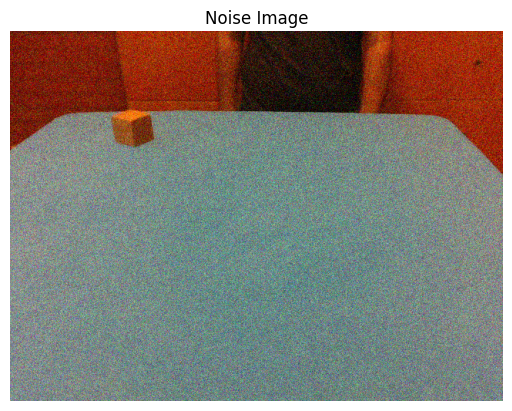

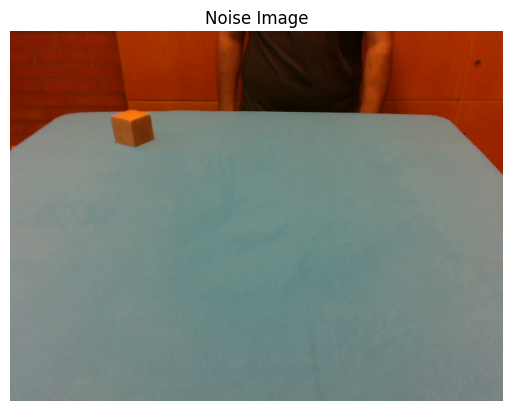

In [10]:
color_img = load_image(color1)
depth_img = load_image(depth1, depth=True)
left_img = load_image(left1)
right_img = load_image(right1)

x = torch.from_numpy(color_img).float()  # Convert to float
x = x / 255.0 

y = add_gaussian_noise(x)

display_image(y.numpy(), "Noise Image")
display_image(color_img, "Noise Image")

# print(f"depth_img.shape = {depth_img.shape},color_img.shape = {color_img.shape},left_img.shape = {left_img.shape},right_img.shape = {right_img.shape}")

# print("Color Image")
# display_image(color_img, "Color Image")
# analyze_pixel_values(color_img)
# plot_histogram(color_img)


# print("Left Image")
# display_image(left_img, "Left Image")
# analyze_pixel_values(left_img)
# plot_histogram(left_img)


# print("Right Image")
# display_image(right_img, "Right Image")
# analyze_pixel_values(right_img)
# plot_histogram(right_img)


# print("Depth Image")
# display_image(depth_img, "Depth Image")
# analyze_pixel_values(depth_img)
# plot_histogram(depth_img)
# analyze_depth_values(depth_img)

In [ ]:
add_gaussian_noise(images, mean=0.1, std=0.4)